In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps 

### Генератор векторов

Сгенерируем трехмерный вектор.

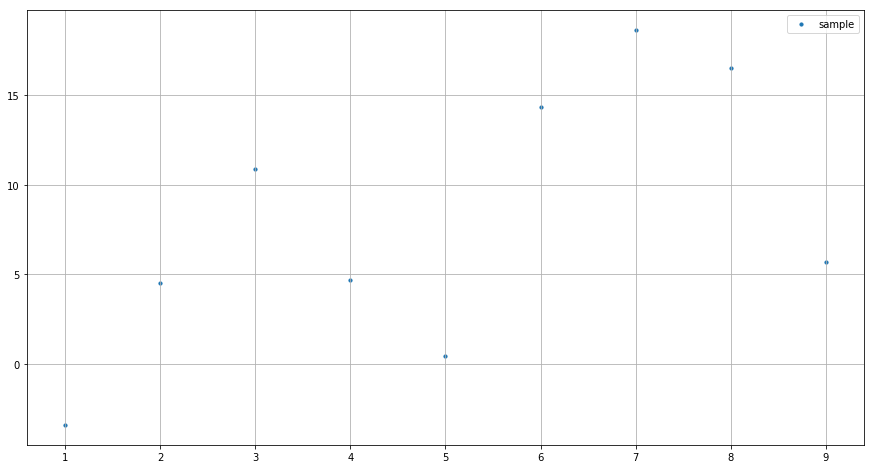

In [93]:
x = np.arange(1,10)
y = 2* x + np.random.randn(9)*10
X = np.vstack((x,y))
plt.figure(figsize=(15, 8))
plt.scatter(x, y, s=10, label='sample')  # s - размер точек
plt.legend()
plt.grid()  # добавляем сетку
plt.show()

In [94]:
def centering(matrix, normalizing = True):
    print(matrix.mean(axis=1))
    matrix -= matrix.mean(axis = 1)[:, np.newaxis]
    if normalizing == True:
        return matrix/(matrix.var(axis = 1)[:, np.newaxis]**0.5)
    return matrix
    
X_new = centering(X, normalizing = True)
print(X_new)

[5.         8.04139552]
[[-1.54919334 -1.161895   -0.77459667 -0.38729833  0.          0.38729833
   0.77459667  1.161895    1.54919334]
 [-1.6182514  -0.49611262  0.40189977 -0.47541884 -1.07529111  0.89377126
   1.50086899  1.19673887 -0.32820493]]


[ 0.00000000e+00 -1.97372982e-16]


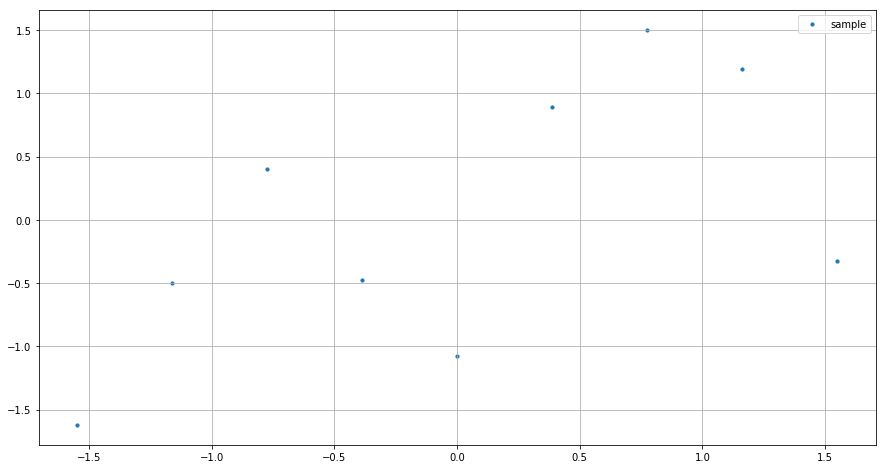

In [95]:
X_new = centering(X, normalizing = True)
plt.figure(figsize=(15, 8))
plt.scatter(X_new[0], X_new[1], s=10, label='sample')  # s - размер точек
plt.legend()
plt.grid()  # добавляем сетку
plt.show()


In [154]:
def PCA(matrix, n = False, epsilon = 0.0001):
    if n == False:
        n = min(matrix.shape)
    counter = 0
    epsilon = epsilon
    E_a = matrix
    d_1 = 1
    d_0 = 0
    p_matrix = np.zeros((n, matrix.shape[1]))
    t_matrix = np.zeros((matrix.shape[0],n))
    while counter < n:
        t_t = np.random.random((1 ,matrix.shape[0]))
        while abs(d_1-d_0) > epsilon:
            d_0 = t_t @ t_t.T
            p_t = t_t @ E_a / (t_t @ t_t.T)
            p = p_t.T/ (p_t @ p_t.T)**0.5
            t = E_a @ p / (p.T @ p)
            d_1 = t.T @ t
            t_t = t.T
        t_matrix[:,counter] = t.ravel()
        p_matrix[counter,:] = p.ravel()
        counter += 1
        E_a = E_a - t @ p.T
    return t_matrix, p_matrix
        

In [155]:
PCA(X_new, n = 2)

(array([[2.67914271, 2.67914271],
        [2.67753255, 2.67753255]]),
 array([[-0.59129253, -0.30966839, -0.06983542, -0.16103512, -0.20050147,
          0.23904216,  0.42463045,  0.44030892,  0.22835141],
        [-0.59129253, -0.30966839, -0.06983542, -0.16103512, -0.20050147,
          0.23904216,  0.42463045,  0.44030892,  0.22835141]]))

In [57]:
t_0 = np.zeros((5,1)).T @ np.zeros((5,1))
print(X.shape)
print(t_0)

(2, 99)
[[0.]]


In [72]:
t_t = np.random.random((1, 2)) @ X_new
print(t_t)


[[-1.70210807 -2.00285179 -1.83021544 -1.70369818 -1.66618834 -1.91608363
  -1.68498392 -1.45918094 -1.43623398 -1.50075711 -1.38200901 -1.43198901
  -1.40415826 -1.31159925 -1.27314694 -1.18854464 -1.27137137 -1.07697425
  -1.01044298 -1.06426073 -1.00478119 -1.09386091 -1.21962605 -0.90464094
  -0.99824851 -1.03727153 -0.9880641  -0.84382023 -0.74530189 -0.70189088
  -0.74527311 -0.660139   -0.71128012 -0.51801921 -0.5489733  -0.42685808
  -0.5776967  -0.44460065 -0.4659432  -0.24777804 -0.35089081 -0.21771392
  -0.16013883 -0.29366027 -0.14179144 -0.05841115 -0.10686915 -0.05803985
   0.05914335 -0.07612231 -0.09237875  0.00466681  0.40186391  0.14232146
   0.14094205  0.39638988  0.4390419   0.12967244  0.19275783  0.31260749
   0.61568348  0.49877832  0.53382776  0.41272812  0.51004112  0.55370429
   0.7590104   0.72676718  0.67200955  0.50301722  0.79656625  0.74643083
   0.89663216  0.85495058  0.8492987   1.1155053   1.08990311  1.05637606
   1.1031863   1.18374412  1.1018967  